In [1]:
import networkx as nx
import json
import os
import ast
import itertools
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def process_record(G, keyword_dict, record):
    authors = record['authors']
    keywords = record['keywords']
    for author in authors:
        if G.has_node(author):
            pass
        else: 
           G.add_node(author)
           keyword_dict[author] = set(keywords)
    
    combinations = list(itertools.combinations(authors, 2))
    for combination in combinations:
        G.add_edge(combination[0], combination[1])
    return G

drugdiscovery_t.json
538


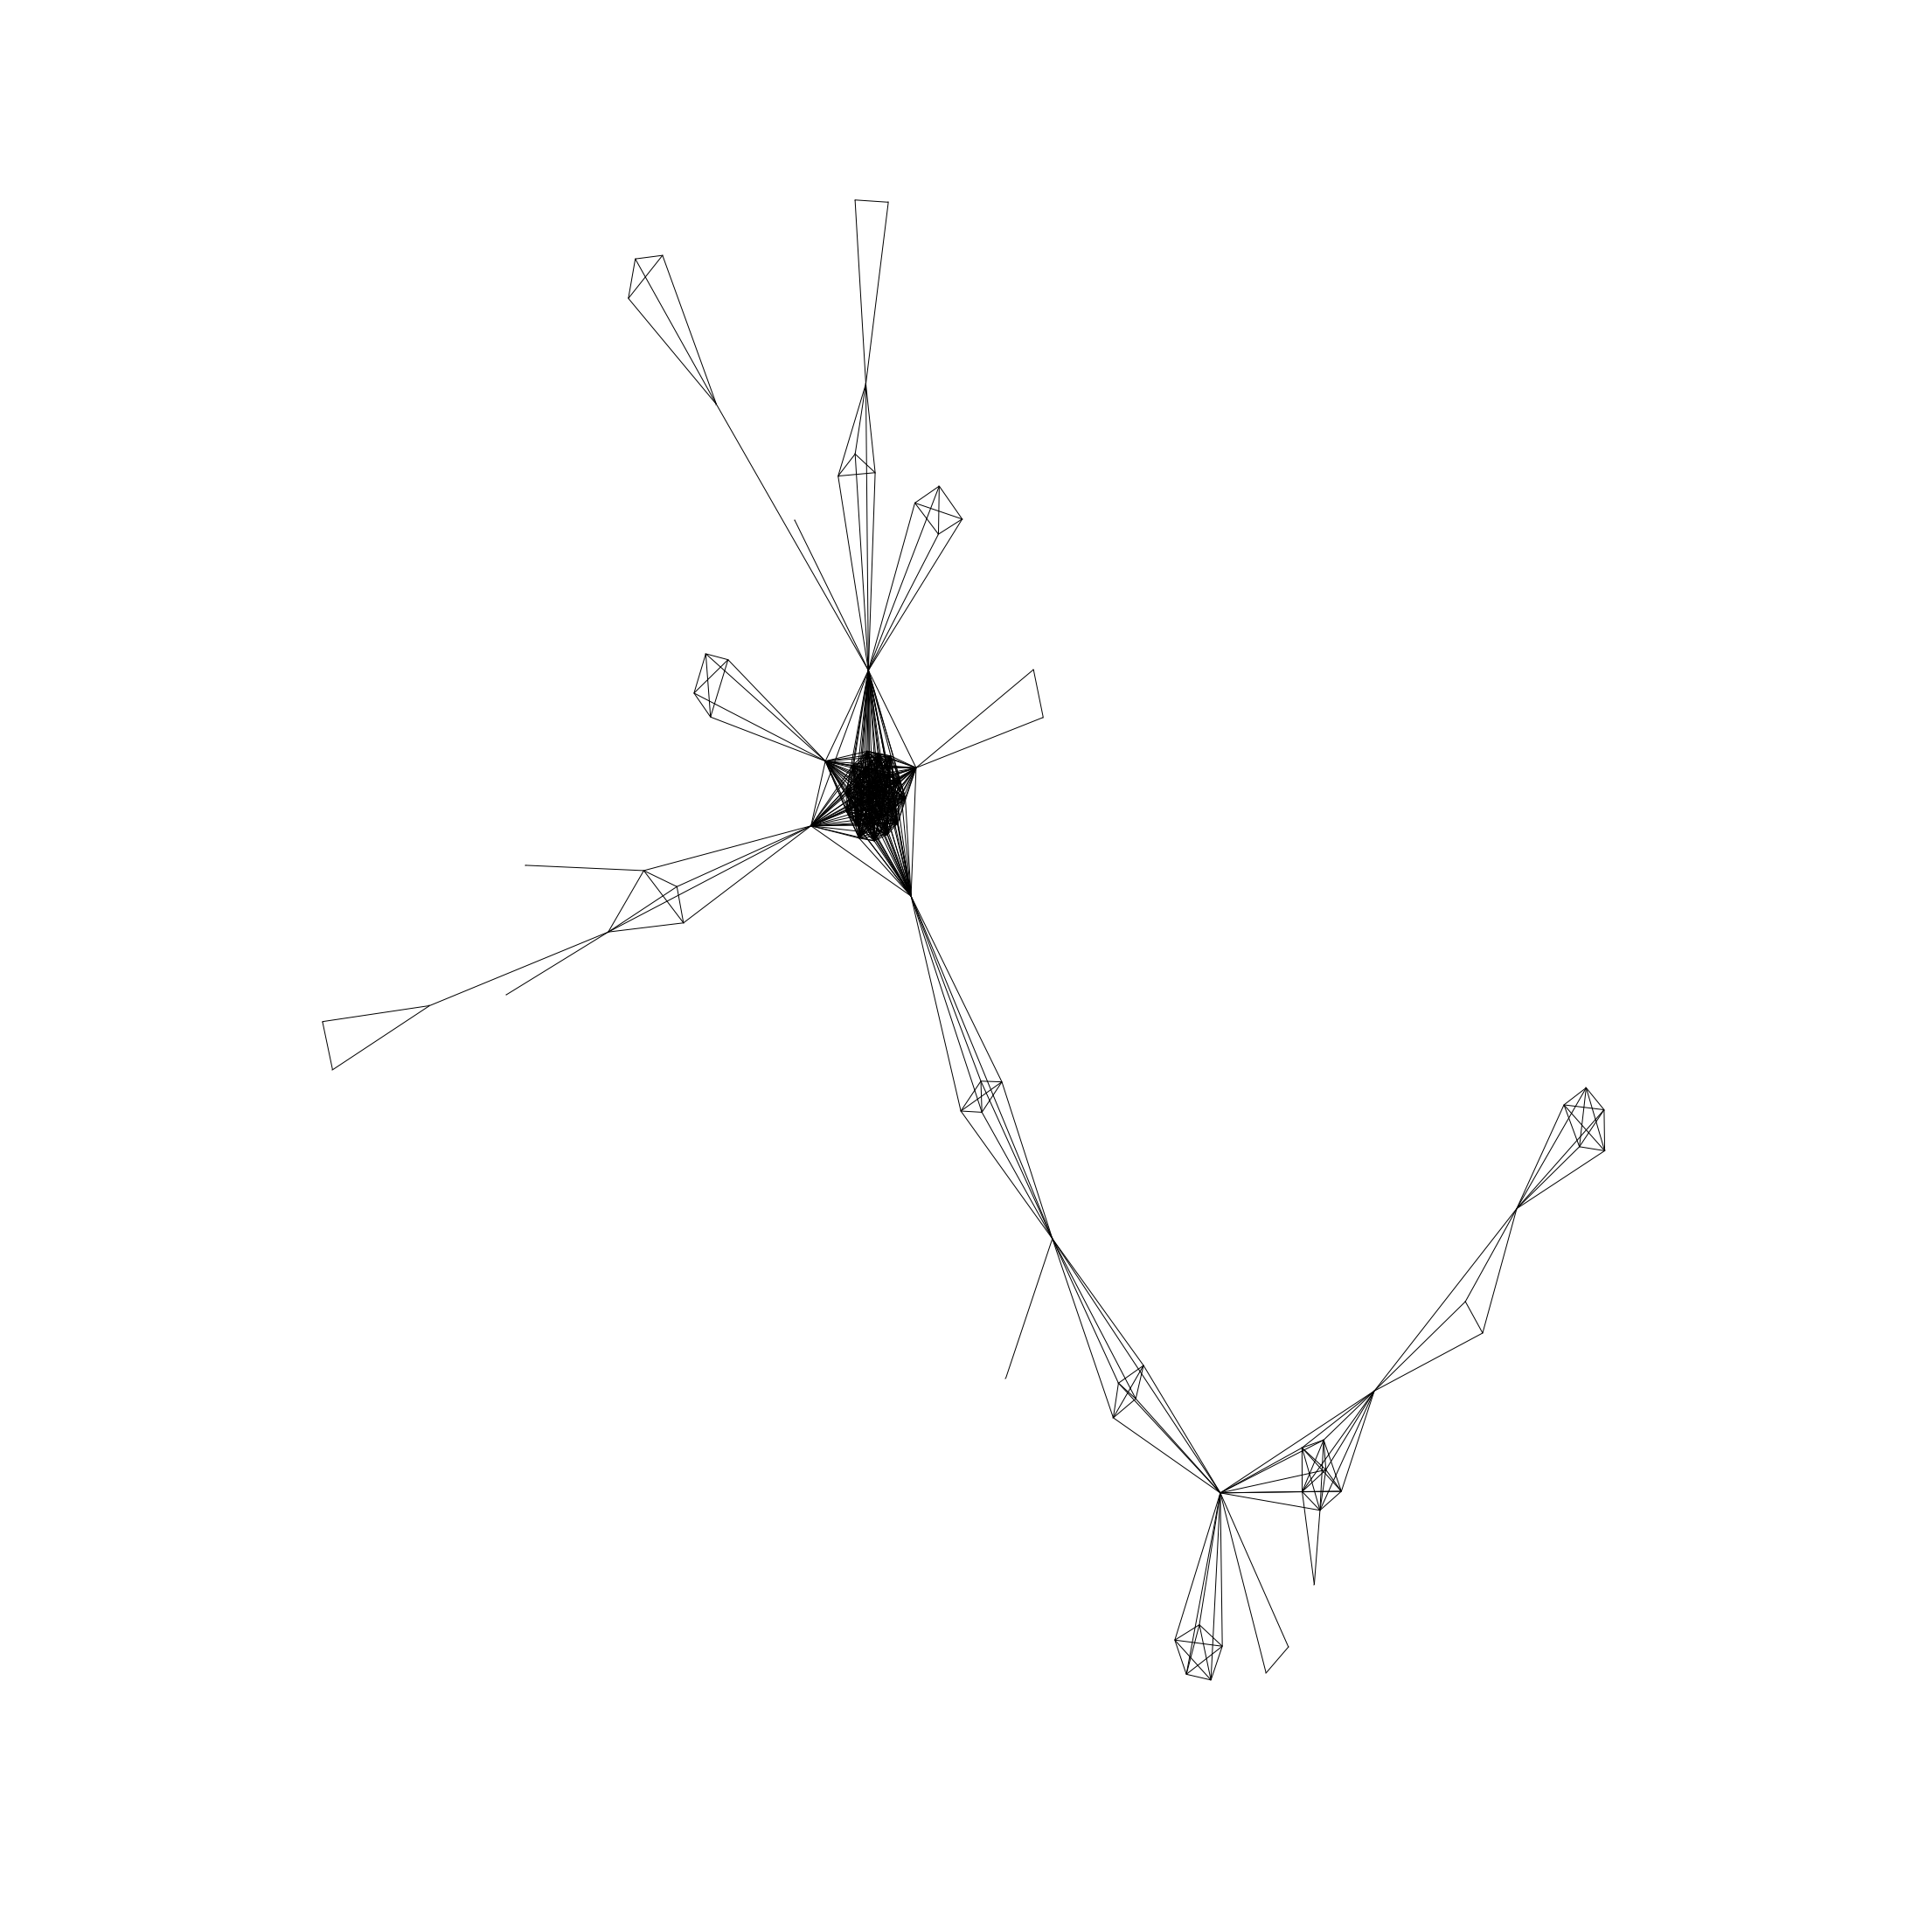

In [13]:
#def main():
G = nx.Graph()
keyword_dict = {}
for i in os.listdir('./data_out'):
    if i.endswith("_t.json"): 
        print(i)
        coauthor_file = open('./data_out/' + i)
        coauthor_records = coauthor_file.read().splitlines()
        for record_str in coauthor_records:
            #print(record_str)
            record = ast.literal_eval(record_str)
            G = process_record(G, keyword_dict, record)
G =max(nx.connected_component_subgraphs(G), key=len)
print(G.number_of_edges())
plt.figure(3,figsize=(30,30)) 
nx.draw(G, node_size=0.1, figsize=(20,20))
plt.draw()
#if __name__ == "__main__":
#    main()

In [14]:
nx.degree_centrality(G)

{'A W Edith Chan': 0.2967032967032967,
 'Aaron Riechers': 0.2967032967032967,
 'Alan Hudson': 0.04395604395604396,
 'Amit P Sheth': 0.05494505494505495,
 'Andrej Sali': 0.2967032967032967,
 'Andrew L Hopkins': 0.34065934065934067,
 'Andrew M Davis': 0.02197802197802198,
 'Anna Gaulton': 0.05494505494505495,
 'Antonis Loizou': 0.05494505494505495,
 'Arnab Pain': 0.2967032967032967,
 'Barbara Zdrazil': 0.05494505494505495,
 'Bernadette Ramirez': 0.06593406593406594,
 'Bhushan K Bonde': 0.08791208791208792,
 'Bissan Al-Lazikani': 0.34065934065934067,
 'Brian Springthorpe': 0.01098901098901099,
 'Bryn I Williams-Jones': 0.07692307692307693,
 'Bryn Williams-Jones': 0.02197802197802198,
 'Charles H Reynolds': 0.04395604395604396,
 'Christiane Hertz-Fowler': 0.2967032967032967,
 'Christine Chichester': 0.1208791208791209,
 'Christophe L M J Verlinde': 0.2967032967032967,
 'Cory R Brouwer': 0.07692307692307693,
 'Daniela Digles': 0.05494505494505495,
 'David A Fidock': 0.04395604395604396,
 'D